<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/kaggle_chicago_crimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import os
import glob
import re

In [ ]:
data_path = glob.glob('/content/drive/MyDrive/Colab Notebooks/udemy - ml workout/DL and ML Practical Tutorials - Package/Project 3/*.csv')

In [ ]:
# check if all datasets are have same structure by checking columns

cols = []
datasets = []

for dataset in data_path:
    cols.append(pd.read_csv(dataset, error_bad_lines = False).columns.tolist())
    dataset_name = re.search('/content/drive/MyDrive/Colab Notebooks/udemy - ml workout/DL and ML Practical Tutorials - Package/Project 3/(.*)\.csv', dataset)
    datasets.append(dataset_name.group(1))

cols_df = pd.DataFrame.from_records(cols).transpose()
cols_df.columns = datasets
cols_df['Check'] = np.where((cols_df.iloc[:,0] == cols_df.iloc[:,1])& (cols_df.iloc[:,2] == cols_df.iloc[:,3]) & (cols_df.iloc[:,0] == cols_df.iloc[:,3]), True, False)
cols_df

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


,Chicago_Crimes_2001_to_2004,Chicago_Crimes_2005_to_2007,Chicago_Crimes_2008_to_2011,Chicago_Crimes_2012_to_2017,Check
0,Unnamed: 0,Unnamed: 0,Unnamed: 0,Unnamed: 0,True
1,ID,ID,ID,ID,True
2,Case Number,Case Number,Case Number,Case Number,True
3,Date,Date,Date,Date,True
4,Block,Block,Block,Block,True
5,IUCR,IUCR,IUCR,IUCR,True
6,Primary Type,Primary Type,Primary Type,Primary Type,True
7,Description,Description,Description,Description,True
8,Location Description,Location Description,Location Description,Location Description,True
9,Arrest,Arrest,Arrest,Arrest,True


In [ ]:
# all datasets are in same structure, read and append all

df = pd.DataFrame()

for i in data_path:
    if len(df) == 0:
        df = pd.read_csv(i, error_bad_lines = False)
    else:
        df = pd.concat([df, pd.read_csv(i, error_bad_lines = False)]) # df.append(pd.read_csv(i, error_bad_lines = False))
df

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,4.0,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413,14.0,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521,25.0,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1.8883e+06,2016.0,05/10/2016 03:56:50 PM,41.8492,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1.85618e+06,2016.0,05/10/2016 03:56:50 PM,41.7607,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1.86281e+06,2016.0,05/10/2016 03:56:50 PM,41.7792,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,1197261.0,1.85073e+06,2016.0,05/10/2016 03:56:50 PM,41.7453,-87.552773,"(41.745251975, -87.552773464)"


In [ ]:
len_ = 0

for i in data_path:
    temp_len = len(pd.read_csv(i, error_bad_lines = False))
    len_ = len_ + temp_len
    print(len_, temp_len)

print(f'\nDataset length: {len_}')

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.



1923515 1923515


b'Skipping line 533719: expected 23 fields, saw 24\n'


3795858 1872343


b'Skipping line 1149094: expected 23 fields, saw 41\n'


6484568 2688710
7941282 1456714

Dataset length: 7941282


In [ ]:
import missingno as msno

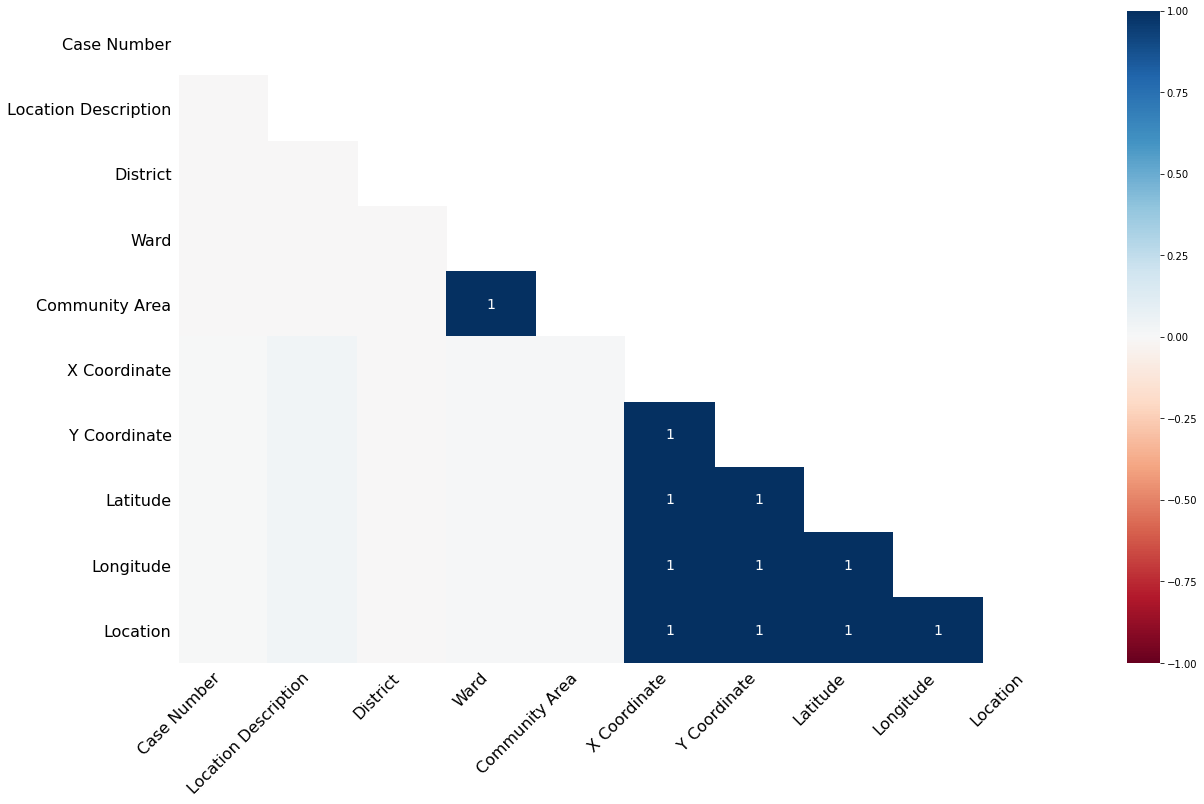

In [ ]:
msno.heatmap(df)

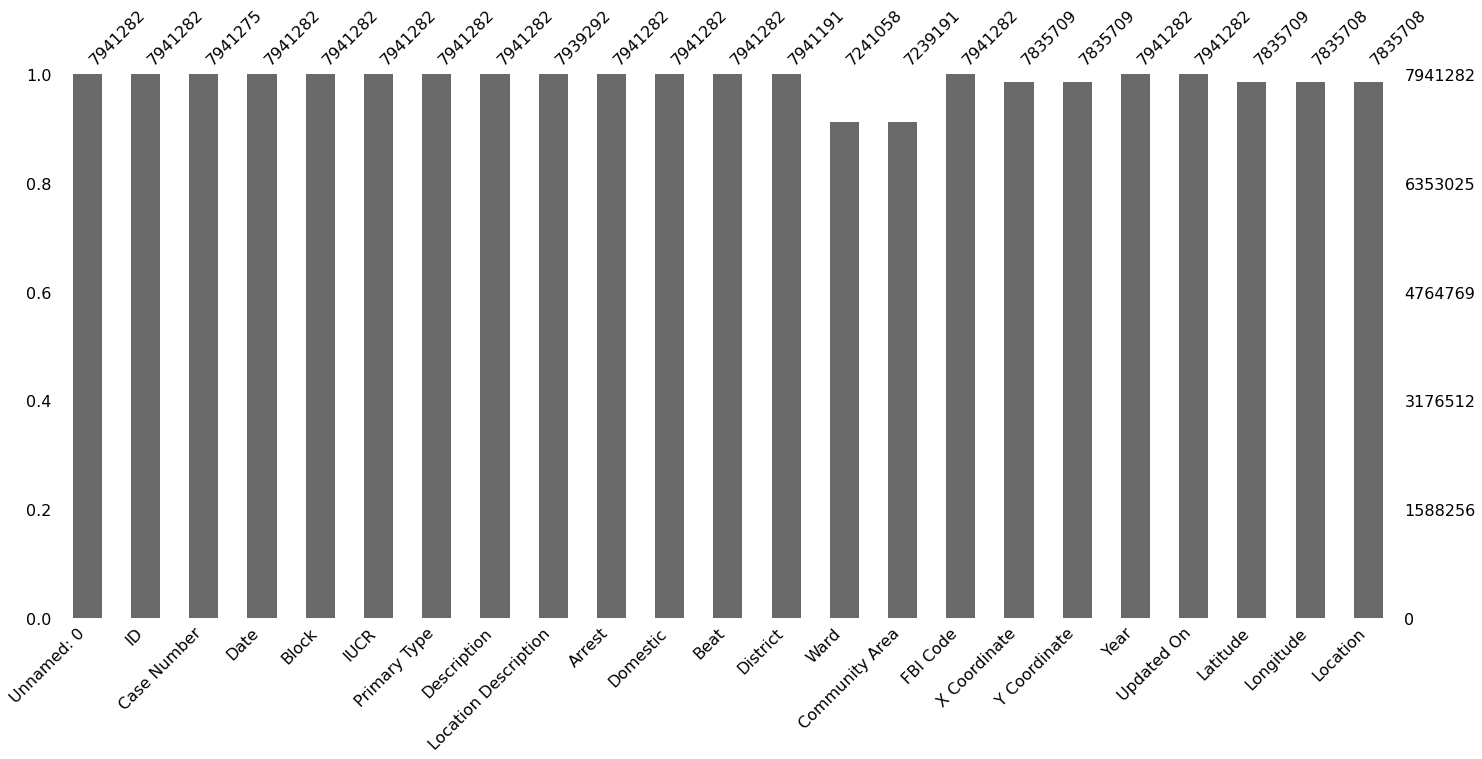

In [ ]:
msno.bar(df)

In [ ]:
df.drop(columns = ['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], 
        inplace = True)

# test for resampling, date format

In [ ]:
sample_ = df.sample(10)

In [ ]:
sample_['Date'] = pd.to_datetime(sample_['Date'])
sample_

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
1155764,5737970,2007-08-22 21:49:33,075XX N OAKLEY AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,STREET,True,False
1620899,3341410,2004-05-20 18:45:00,051XX S DR MARTIN LUTHER KING JR DR,CRIMINAL TRESPASS,TO LAND,DRIVEWAY - RESIDENTIAL,True,False
65086,6092211,2008-02-23 03:47:34,088XX S ADA ST,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
830484,7320864,2010-01-16 17:30:00,083XX S BUFFALO AVE,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,False,False
909971,9787825,2014-09-21 11:48:00,055XX W VAN BUREN ST,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False
867584,2398465,2002-10-10 13:29:11,014XX E 70TH ST,STALKING,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False
1393679,3060006,2003-11-22 12:20:00,063XX S MARSHFIELD AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
1921923,4337453,2001-01-01 09:00:00,002XX N LA SALLE ST,THEFT,OVER $500,OTHER,True,False
676262,7085468,2009-08-18 11:24:22,024XX W 63RD ST,THEFT,ATTEMPT THEFT,SMALL RETAIL STORE,False,False
1257046,2890556,2003-08-11 15:15:00,029XX N MASON AVE,BATTERY,SIMPLE,RESIDENCE,False,False


In [ ]:
sample_.set_index(['Date'], inplace = True)

In [ ]:
sample_

,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2007-08-22 21:49:33,5737970,075XX N OAKLEY AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,STREET,True,False
2004-05-20 18:45:00,3341410,051XX S DR MARTIN LUTHER KING JR DR,CRIMINAL TRESPASS,TO LAND,DRIVEWAY - RESIDENTIAL,True,False
2008-02-23 03:47:34,6092211,088XX S ADA ST,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
2010-01-16 17:30:00,7320864,083XX S BUFFALO AVE,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,False,False
2014-09-21 11:48:00,9787825,055XX W VAN BUREN ST,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False
2002-10-10 13:29:11,2398465,014XX E 70TH ST,STALKING,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False
2003-11-22 12:20:00,3060006,063XX S MARSHFIELD AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2001-01-01 09:00:00,4337453,002XX N LA SALLE ST,THEFT,OVER $500,OTHER,True,False
2009-08-18 11:24:22,7085468,024XX W 63RD ST,THEFT,ATTEMPT THEFT,SMALL RETAIL STORE,False,False


In [ ]:
sample_.resample('Y').count()

,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2001-12-31,1,1,1,1,1,1,1
2002-12-31,1,1,1,1,1,1,1
2003-12-31,2,2,2,2,2,2,2
2004-12-31,1,1,1,1,1,1,1
2005-12-31,0,0,0,0,0,0,0
2006-12-31,0,0,0,0,0,0,0
2007-12-31,1,1,1,1,1,1,1
2008-12-31,1,1,1,1,1,1,1
2009-12-31,1,1,1,1,1,1,1


In [ ]:
sample_.resample('Y').size()

Date
2001-12-31    1
2002-12-31    1
2003-12-31    2
2004-12-31    1
2005-12-31    0
2006-12-31    0
2007-12-31    1
2008-12-31    1
2009-12-31    1
2010-12-31    1
2011-12-31    0
2012-12-31    0
2013-12-31    0
2014-12-31    1
Freq: A-DEC, dtype: int64

# implementation to main df 


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df['Date'])

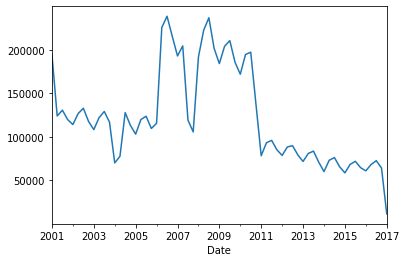

In [ ]:
qtr_crime = df.resample('Q').size()
qtr_crime.plot()

In [ ]:
df[['Primary Type']].resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

In [ ]:
by_yr_crime = pd.DataFrame(df.groupby(['Primary Type', ]).resample('Y').size()).reset_index()

In [ ]:
by_yr_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Primary Type  513 non-null    object        
 1   Date          513 non-null    datetime64[ns]
 2   0             513 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.1+ KB


In [ ]:
by_yr_crime.rename(mapper = {0:'Count'}, axis = 1, inplace = True)

[]

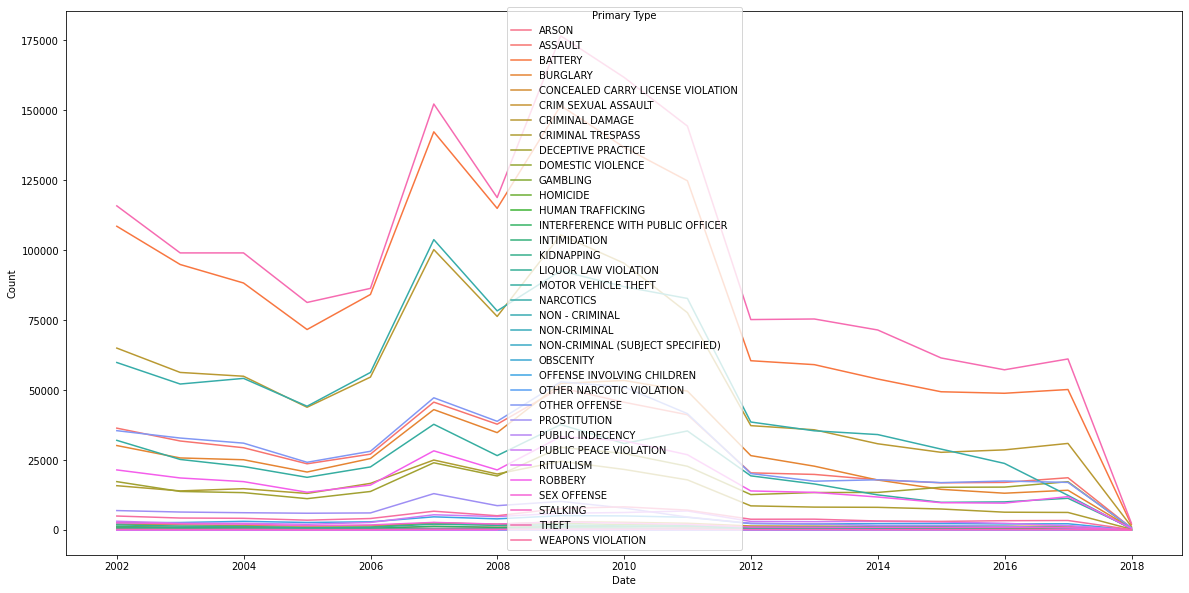

In [ ]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Date', y = 'Count', hue = 'Primary Type', data = by_yr_crime)
plt.plot()

In [ ]:
total_crime = df.groupby('Primary Type').size().sort_values(ascending = False)

In [ ]:
total_crime.to_frame().reset_index(inplace = True)

In [ ]:
total_crime = total_crime.to_frame()

In [ ]:
total_crime.reset_index(inplace = True)

In [ ]:
total_crime.rename(mapper = {0: 'Count'}, axis = 1, inplace = True)

[]

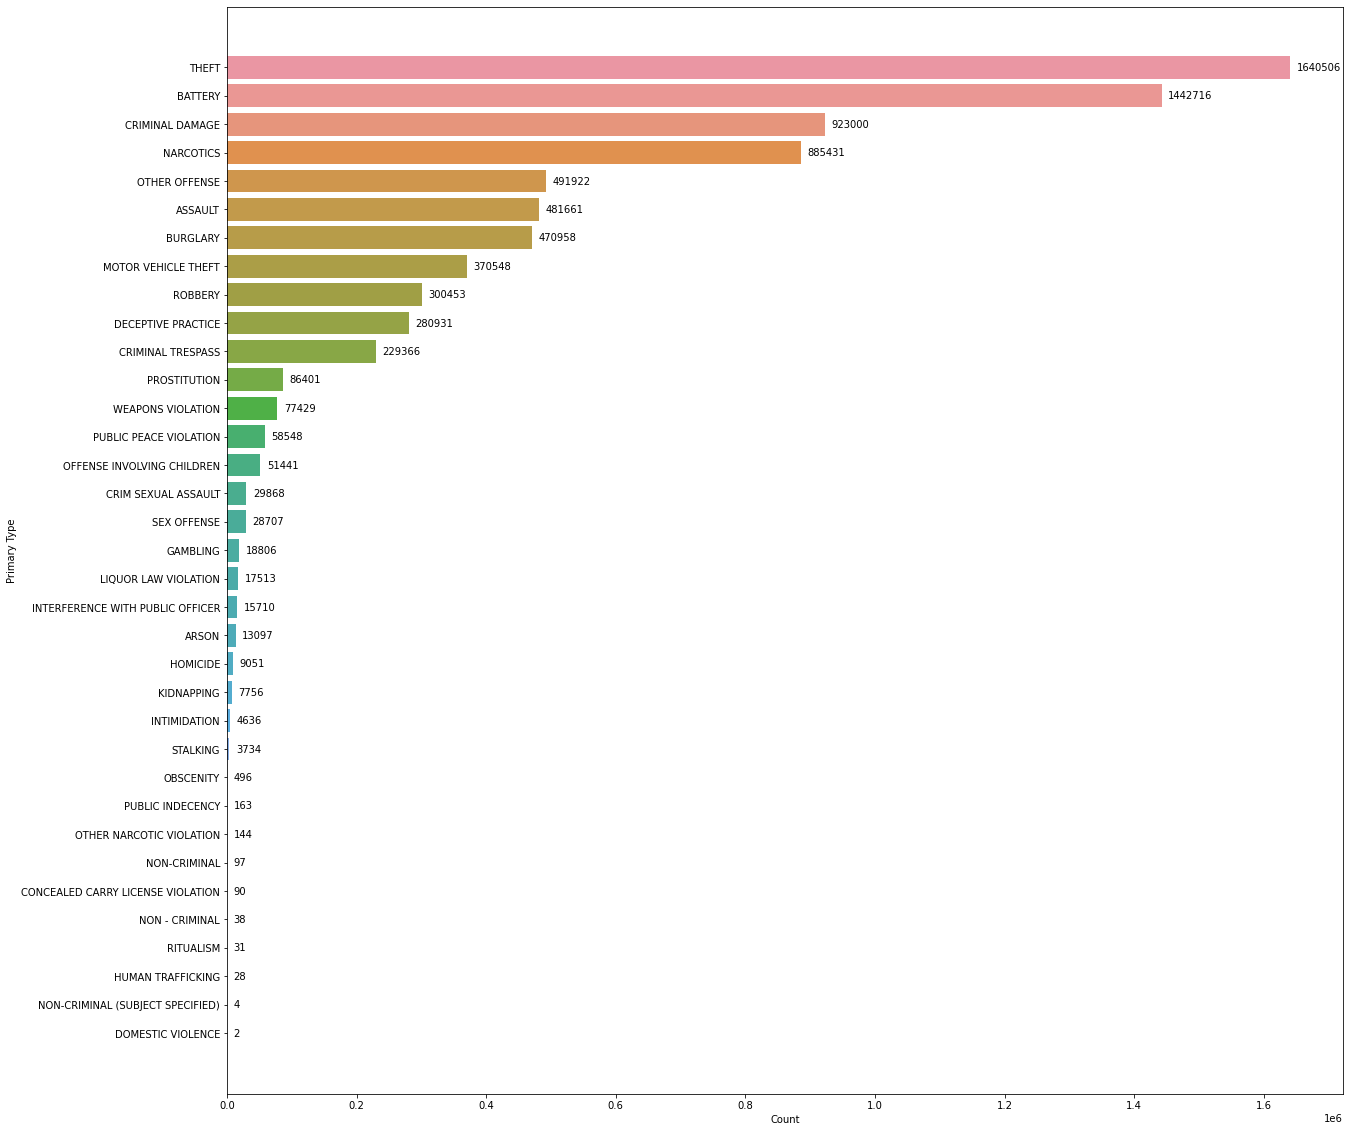

In [ ]:
plt.figure(figsize = (20,20))



# plot horizontal barplot

ax = sns.barplot(data = total_crime, x = 'Count', y = 'Primary Type', orient = 'h')

# add label each bar 

for position in ax.patches: 
    
    # get coordinates for each position
    height = position.get_height() # height of each horizontal bar is the same 
    width = position.get_width() # width - actual count of crime 

    # add label
    ax.text(x = width + 10000, # x-coordinate position of data label, padded +1
            y = position.get_y() + (height/2), # y-coordinate position of data label
            s = '{:.0f}'.format(width), # actual text
            va = 'center' # vertical alignment
            )



plt.plot()

In [ ]:
monthly_ = df.resample('M').size().reset_index()
monthly_.columns = ['Date','Count']

**For Facebook Prophet columns need to be named ['ds', 'y']**

In [ ]:
monthly_prop = monthly_.rename(mapper = {'Date':'ds','Count':'y'}, axis = 1)
monthly_prop

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()
model.fit(monthly_prop)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods = 12)
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40548.488274,23751.381183,54181.339643,40548.488274,40548.488274,-1578.253465,-1578.253465,-1578.253465,-1578.253465,-1578.253465,-1578.253465,0.0,0.0,0.0,38970.234809
1,2001-02-28,40695.732253,19505.430326,50417.133774,40695.732253,40695.732253,-6453.992631,-6453.992631,-6453.992631,-6453.992631,-6453.992631,-6453.992631,0.0,0.0,0.0,34241.739623
2,2001-03-31,40858.752373,23123.706266,54434.103041,40858.752373,40858.752373,-2068.601484,-2068.601484,-2068.601484,-2068.601484,-2068.601484,-2068.601484,0.0,0.0,0.0,38790.150889
3,2001-04-30,41016.513779,24127.428288,56631.082502,41016.513779,41016.513779,-1472.229751,-1472.229751,-1472.229751,-1472.229751,-1472.229751,-1472.229751,0.0,0.0,0.0,39544.284028
4,2001-05-31,41179.533899,28730.226794,60671.483400,41179.533899,41179.533899,3883.090066,3883.090066,3883.090066,3883.090066,3883.090066,3883.090066,0.0,0.0,0.0,45062.623965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2017-02-08,14016.494081,-9813.393544,22772.173052,14016.494081,14016.494081,-6967.302438,-6967.302438,-6967.302438,-6967.302438,-6967.302438,-6967.302438,0.0,0.0,0.0,7049.191643
201,2017-02-09,14002.497846,-11084.933071,20283.146028,14002.497846,14002.497846,-8355.426789,-8355.426789,-8355.426789,-8355.426789,-8355.426789,-8355.426789,0.0,0.0,0.0,5647.071057
202,2017-02-10,13988.501611,-12738.807471,20667.015125,13988.501611,13988.501611,-9815.075001,-9815.075001,-9815.075001,-9815.075001,-9815.075001,-9815.075001,0.0,0.0,0.0,4173.426611
203,2017-02-11,13974.505376,-12052.647306,18801.528962,13974.505376,13974.505376,-11306.554098,-11306.554098,-11306.554098,-11306.554098,-11306.554098,-11306.554098,0.0,0.0,0.0,2667.951278


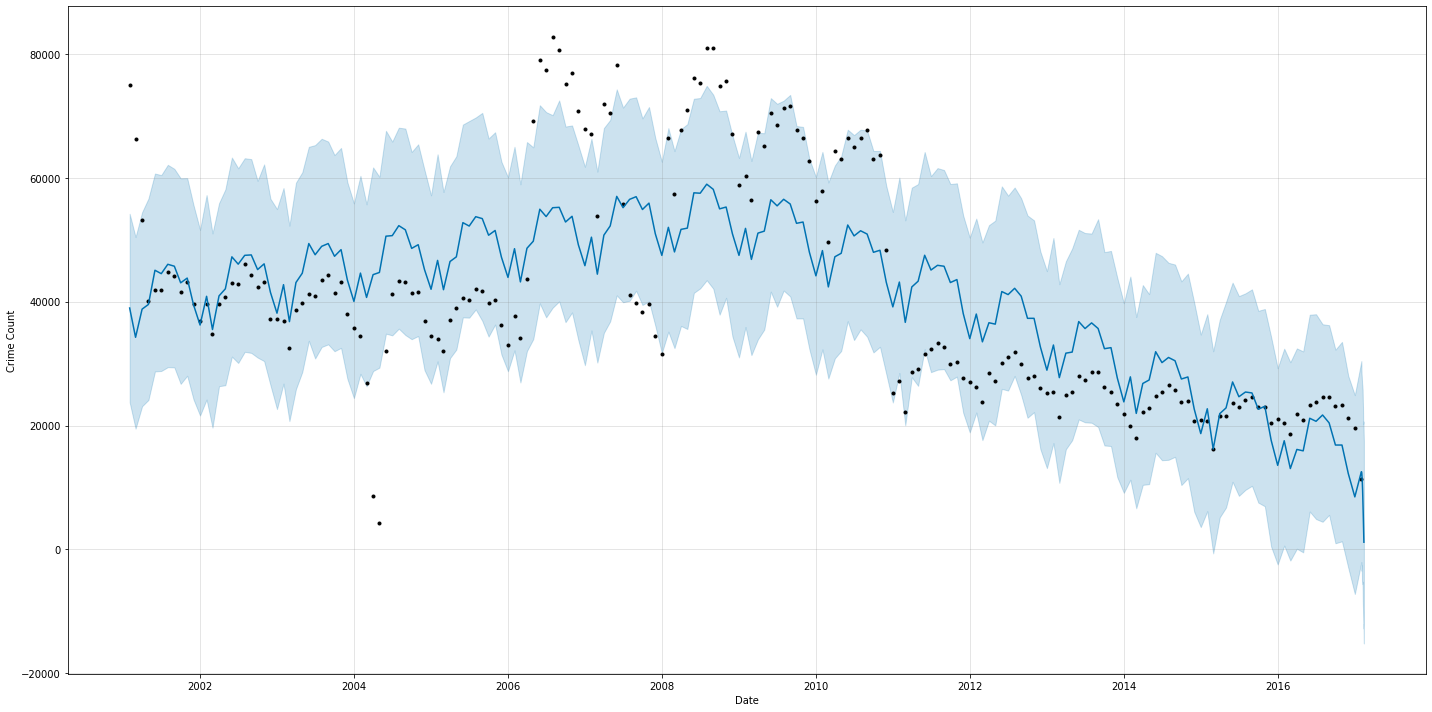

In [ ]:
figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Crime Count', figsize = (20,10), )

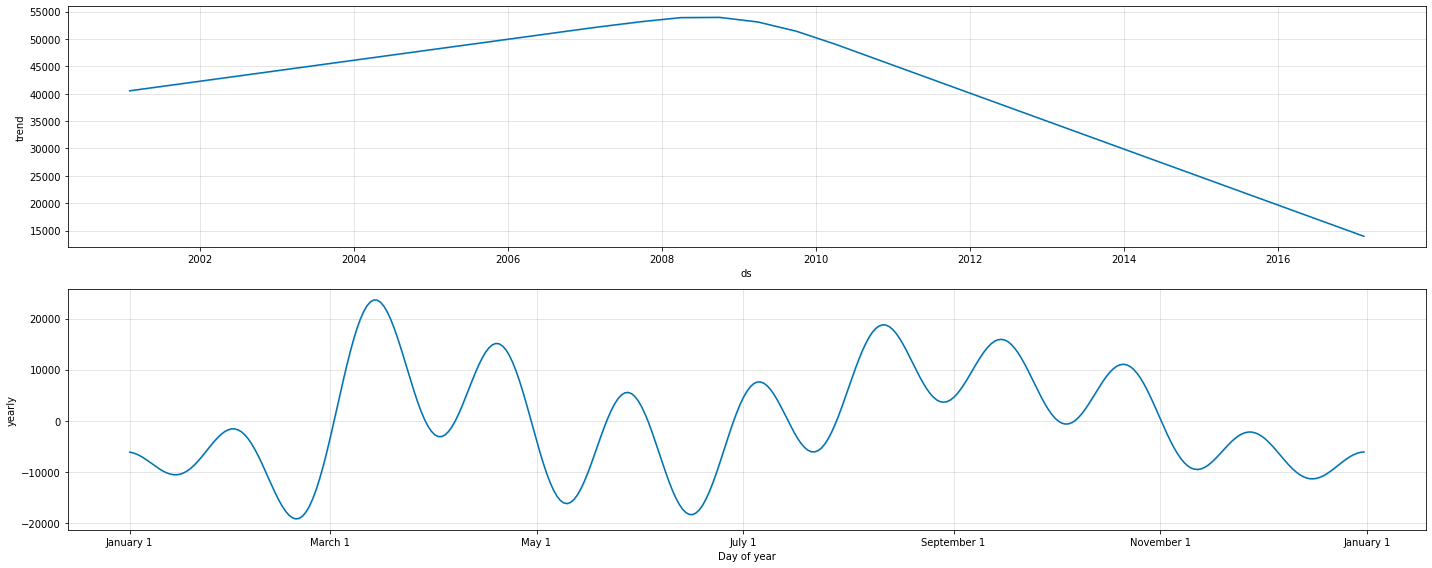

In [ ]:
figure2 = model.plot_components(forecast, figsize = (20,8))